## Student Information

Please enter the names and IDs of the two students below:

1. **Name**: [Norhan Reda Abdelwahed Ahmed]  
   **ID**: `9203639` 

2. **Name**: [Hoda Gamal Hamouda Ismail]  
   **ID**: `9203673` 


## Students Instructions

This is your first graded lab assignment, as you put the work you have studied in the lectures in action, please take this opportunity to enhance your understanding of the concepts and hone your skills. As you work on your assignment, please keep the following instructions in mind:

- Clearly state your personal information where indicated.
- Be ready with your work before the time of the next discussion slot in the schedule.
- Plagiarism will be met with penalties, refrain from copying any answers to make the most out of the assignment. If any signs of plagiarism are detected, actions will be taken.
- It is acceptable to share the workload of the assignment bearing the discussion in mind.
- Feel free to [reach out](mailto:cmpsy27@gmail.com) if there were any ambiguities.




## Installation Instructions

In this lab assignment, we require additional Python libraries for scientific mathematics, particularly in the context of machine learning (ML) and satellite image analysis. To fulfill these requirements, we need to install Scikit-learn and Scikit-image. 
1. Install Scikit-learn  
Scikit-learn (Sklearn) is a powerful Python library for ML tasks, offering various algorithms for classification, regression, clustering, and model evaluation. It is extensively used for analyzing satellite imagery, enabling tasks such as land cover classification and environmental parameter prediction. On the other hand, Scikit-image (Skimage) provides comprehensive tools for image processing and computer vision, facilitating tasks such as image preprocessing, feature extraction, and segmentation. These libraries are essential for extracting valuable insights from satellite images and conducting advanced analysis in scientific computing and research domains.
```bash
pip install scikit-learn scikit-image
```


In [2]:
##Import all needed libraries
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import io

'''
##The dataset is loaded to your GDrive so need to be mounted
from google.colab import drive
drive.mount('/content/drive')
''';

The PCA (Principal Component Analysis) algorithm, found within the `sklearn.decomposition` module, is widely utilized in machine learning for reducing the dimensionality of datasets. Its primary goal is to identify essential patterns or structures within the data.

In the realm of image processing, PCA serves to decrease the dimensionality of images by extracting a smaller set of features that capture the majority of the original data's variation. This becomes particularly beneficial as images often contain numerous pixels, posing challenges in data analysis and visualization.

Functioning by determining new coordinate systems that effectively encapsulate the data's variance, PCA identifies these coordinates as principal components. Each principal component sequentially captures varying degrees of data variance, enabling the reduction of data dimensionality while preserving significant information by retaining only the most informative principal components.


## R1- Apply PCA to RGB image

To implement PCA on an RGB image, the following steps are undertaken:

- **Convert the image to a 2D array of pixel values**: Begin by converting the RGB image into a two-dimensional array of pixel values. Each row of the array represents a pixel, and each column represents a color channel (R, G, B).

- **Scale the data to have zero mean and unit variance along each feature (channel) axis**: This step is crucial for ensuring that each color channel contributes equally to the PCA analysis. Scaling the data to have zero mean and unit variance along each feature axis helps in standardizing the range of values across different channels, preventing any single channel from dominating the analysis.

- **Perform PCA with 3 components using scikit-learn**: Utilize the scikit-learn library to perform Principal Component Analysis with three components. The choice of three components is made to retain sufficient information while reducing the dimensionality of the data. This decision aims to strike a balance between capturing significant variance and avoiding overfitting.

### Requirements

- Plot the Eigen Vectors in 3D.
- Remove the least significant principal component.
- Plot the most significant eigen vectors in 2D.
- State the percentage of variance covered and provide commentary on its significance.


Shape of the 2D array: (4096, 3)


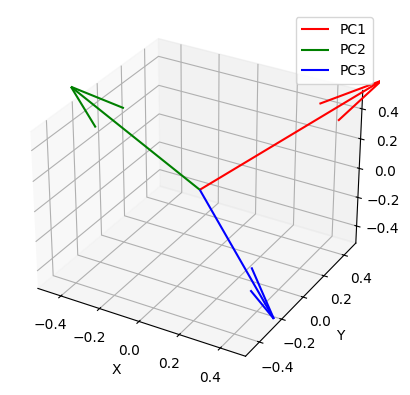

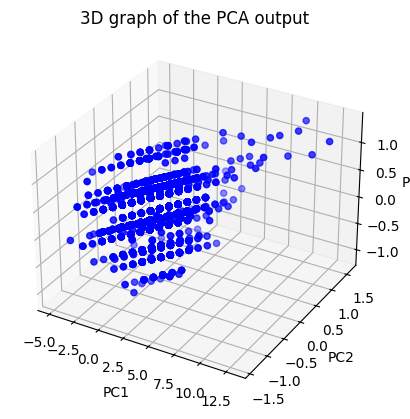

covariance matrix is
 [[1.0002442  0.8636258  0.82428732]
 [0.8636258  1.0002442  0.8176574 ]
 [0.82428732 0.8176574  1.0002442 ]]
eigen value is
 [2.67079057 0.19358658 0.13635545]
eigen vectors is
 [[ 0.58139025  0.57989717  0.57070539]
 [-0.35500143 -0.4503447   0.81924578]
 [ 0.73209245 -0.67890274 -0.0559617 ]]
as we see that the covariance matrix of the input is a symmetric matrix all the diagonal elements are 1 
and as we see the eigen vectors are 3 vector and each vector is 1*3 
the eigen values are 3 numbers that then will represent thr covariance matrix of the output image


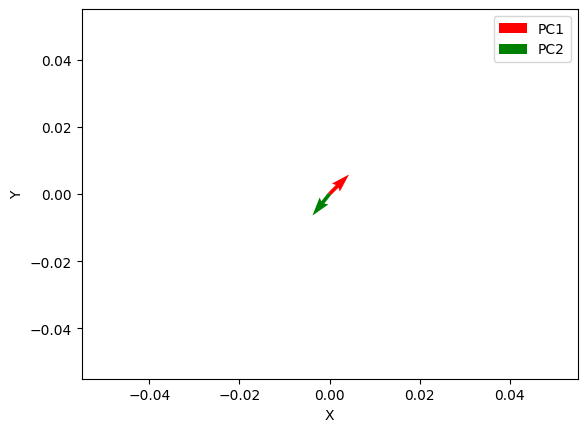

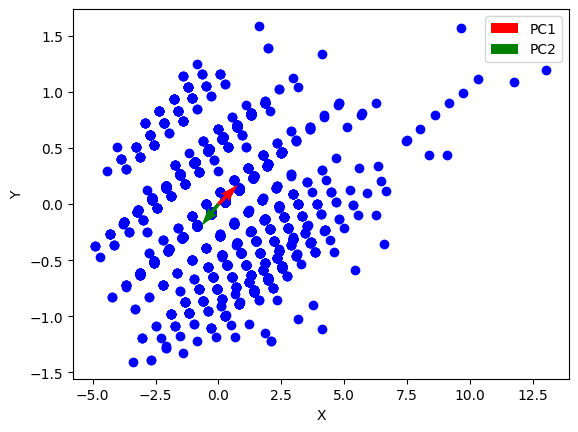

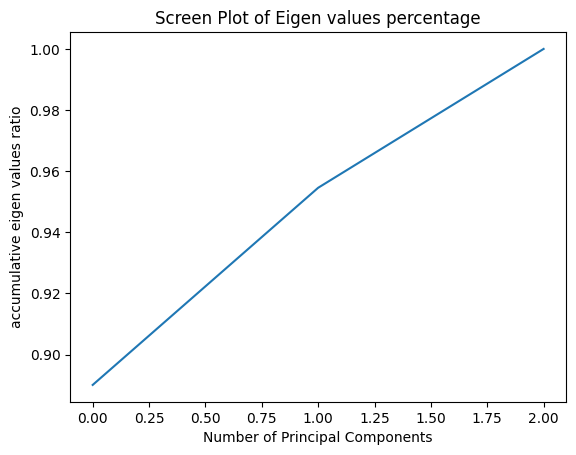

explained variance ratio

[0.89004617 0.06451311 0.04544072]

 from this ratios we can see that the first component has the highest ratio so we can neglect the other two components

the percentage of variance covered: 95.4559280716786 %


In [10]:
# Requirement 1

# TODO: Load the JPG image "Forest_1.jpg"
image = io.imread("Forest_1.jpg")
# TODO: Convert the image to a 2D array of pixel values
image_2d = image.reshape(image.shape[0] * image.shape[1], image.shape[2])

# Print the shape of the 2D array
print("Shape of the 2D array:", image_2d.shape)
# TODO: Scale the data to have zero mean and unit variance along each feature axis.

scaler = StandardScaler()
image_scaled = scaler.fit_transform(image_2d)

# TODO: Perform PCA with 3 components

pca = PCA(n_components=3)
pca = pca.fit(image_scaled)
image_pca=pca.transform(image_scaled)

# TODO: Screen plot of the eigen vectors

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the eigen vectors
origin = [0, 0, 0]  # Origin point for the quiver plot
colors = ['r', 'g', 'b']  # Colors for the eigen vectors
labels = ['PC1', 'PC2', 'PC3']  # Labels for the eigen vectors
                                #1*3
for vector, color, label in zip(pca.components_, colors, labels):
    ax.quiver(origin[0], origin[1], origin[2], vector[0], vector[1], vector[2], color=color, label=label)

# Set limits and labels
ax.set_xlim([-0.5, 0.5])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([-0.5, 0.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add legend
ax.legend()

# Show the plot
# plt.show()
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(pca.components_[:,0],pca.components_[:,1], pca.components_[:,2], c='blue')
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# ax.set_title('3D graph of the PCA components')
# plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(image_pca[:,0],image_pca[:,1], image_pca[:,2], c='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D graph of the PCA output')
plt.show()



# TODO: Remove the lowest unimportant PC
num_components_to_keep = 2
image_pca_truncated = image_pca[:, :num_components_to_keep]


# TODO: Print the covariance matrix, eigenvalues, and eigen vectors and comment on the result.
covariance_matrix = pca.get_covariance()
eigen_values = pca.explained_variance_
eigen_vectors = pca.components_

print("covariance matrix is\n",covariance_matrix)
print("eigen value is\n",eigen_values)
print("eigen vectors is\n",eigen_vectors)
print("as we see that the covariance matrix of the input is a symmetric matrix all the diagonal elements are 1 ")
print("and as we see the eigen vectors are 3 vector and each vector is 1*3 ")
print("the eigen values are 3 numbers that then will represent thr covariance matrix of the output image")


# TODO: Plot the most significant eigen vectors in 2D.

fig, ax = plt.subplots()

# Plot the eigen vectors
origin = [0, 0]  # Origin point for the quiver plot
colors = ['r', 'g']  # Colors for the eigen vectors
labels = ['PC1', 'PC2']  # Labels for the eigen vectors
                                 #1*3 
for vector, color, label in zip(pca.components_[:2], colors, labels):
    ax.quiver(origin[0], origin[1], vector[0], vector[1], color=color, label=label)

# Set limits and labels
# ax.set_xlim([-0.5, 0.5])
# ax.set_ylim([-0.5, 0.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Add legend
ax.legend()

# Show the plot
plt.show()


fig, ax = plt.subplots()

# Plot the eigen vectors
origin = [0, 0]  # Origin point for the quiver plot
colors = ['r', 'g']  # Colors for the eigen vectors
labels = ['PC1', 'PC2']  # Labels for the eigen vectors
plt.scatter(image_pca[:,0], image_pca[:,1], c='blue')                                #1*3 
for vector, color, label in zip(pca.components_[:2], colors, labels):
    ax.quiver(origin[0], origin[1], vector[0], vector[1], color=color, label=label)

# Set limits and labels
# ax.set_xlim([-0.5, 0.5])
# ax.set_ylim([-0.5, 0.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Add legend
ax.legend()

# Show the plot
plt.show()


# plt.scatter(image_pca[:,0], image_pca[:,1], c='blue')
# plt.title('2D points of the highest PC')
# plt.show()



# TODO: State the percentage of variance covered and provide commentary on its significance.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('accumulative eigen values ratio')
plt.title('Screen Plot of Eigen values percentage')
plt.show()
print("explained variance ratio\n")
print(pca.explained_variance_ratio_)
print("\n from this ratios we can see that the first component has the highest ratio so we can neglect the other two components\n")
print("the percentage of variance covered:",np.cumsum(pca.explained_variance_ratio_[:2])[1]*100,'%' )


## R2- Apply PCA to satellite image

To implement PCA on a satellite image, the same afromentioned steps are undertaken:

### Requirements
- Apply PCA without loss.
- Show the covariance matrix.
- Show the Eigen Values and Vectors.
- Choose the three most significant axis.
- Plot the most significant eigen vectors in 3D.
- State the percentage of variance covered and provide commentary on its significance.
- Q: What can be achieved now by the transformed image?


4096


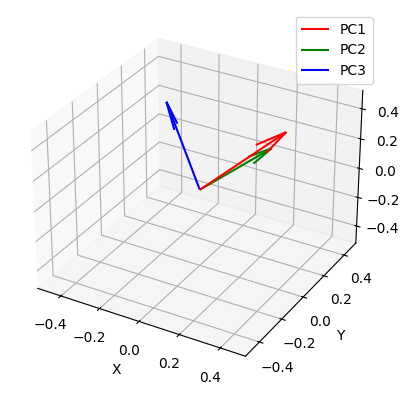

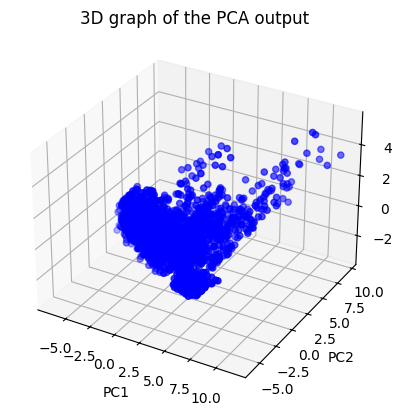

covariance matrix is
 [[1.0002442  0.59559776 0.61406218 0.60466954 0.81460493 0.35241389
  0.26114078 0.23165142 0.45724325 0.49926674 0.83689492 0.84587288
  0.3375756 ]
 [0.59559776 1.0002442  0.92452217 0.95155916 0.73920898 0.27344475
  0.1862618  0.23254376 0.26601598 0.20746685 0.70911135 0.77830538
  0.23861218]
 [0.61406218 0.92452217 1.0002442  0.87702778 0.83048763 0.49399344
  0.4021636  0.4653699  0.45083282 0.22413905 0.78234585 0.78335706
  0.45352358]
 [0.60466954 0.95155916 0.87702778 1.0002442  0.74931132 0.16850132
  0.07488136 0.10501087 0.2176465  0.21777994 0.71556726 0.81103462
  0.13820643]
 [0.81460493 0.73920898 0.83048763 0.74931132 1.0002442  0.56397738
  0.45163535 0.40749783 0.59897257 0.31892423 0.96174341 0.93855674
  0.52852461]
 [0.35241389 0.27344475 0.49399344 0.16850132 0.56397738 1.0002442
  0.98523079 0.86030819 0.83901748 0.13322983 0.57706775 0.35946449
  0.99047721]
 [0.26114078 0.1862618  0.4021636  0.07488136 0.45163535 0.98523079
  1.0002442

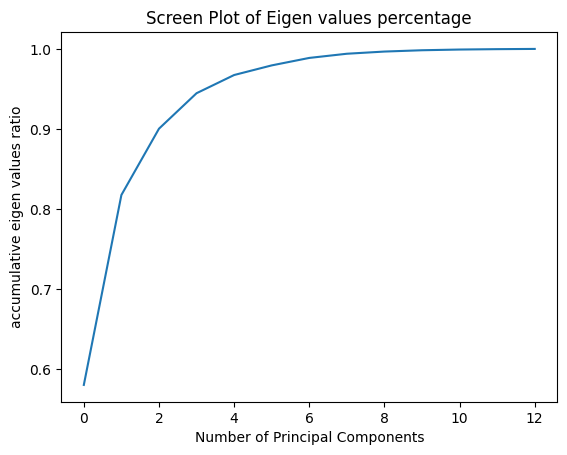

explained variance ratio

[5.80113846e-01 2.37362267e-01 8.28290842e-02 4.43410081e-02
 2.27395394e-02 1.20302681e-02 9.33837142e-03 5.22216318e-03
 2.73126467e-03 1.63731270e-03 8.86504976e-04 4.76107970e-04
 2.92262676e-04]
the percentage of variance covered: 90.03051968077645 %


' \nanswer is down in a markdown \n'

In [9]:
# Requirement 2

# TODO: Load the TIF image "Forest_27.tif"
image = io.imread('Forest_27.tif')
# TODO: Convert the image to a 2D array of pixel values
image_2d = image.reshape(image.shape[0] * image.shape[1], image.shape[2])
print(image.shape[0] * image.shape[1])
# TODO: Scale the data to have zero mean and unit variance along each feature axis.
scaler = StandardScaler()
image_scaled = scaler.fit_transform(image_2d)
# TODO: Perform PCA 
pca = PCA(n_components=image.shape[2])
pca = pca.fit(image_scaled)
image_pca=pca.transform(image_scaled)
# TODO: Keep the 3 most significant PCs 
num_components_to_keep = 3
image_pca_truncated = image_pca[:, :num_components_to_keep]

# TODO: Plot the graph of the PCA vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the eigen vectors
origin = [0, 0, 0]  # Origin point for the quiver plot
colors = ['r', 'g', 'b']  # Colors for the eigen vectors
labels = ['PC1', 'PC2', 'PC3']  # Labels for the eigen vectors

for vector, color, label in zip(pca.components_[:3], colors, labels):
    ax.quiver(origin[0], origin[1], origin[2], vector[0], vector[1], vector[2], color=color, label=label)

# Set limits and labels
ax.set_xlim([-0.5, 0.5])
ax.set_ylim([-0.5, 0.5])
ax.set_zlim([-0.5, 0.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add legend
ax.legend()

# # Show the plot
# plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(image_pca_truncated[:,0], image_pca_truncated[:,1], image_pca_truncated[:,2], c='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D graph of the PCA output')
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(image_2d[:,0], image_pca_truncated[:,1], image_2d[:,2], c='red')
# ax.set_xlabel('r')
# ax.set_ylabel('g')
# ax.set_zlabel('b')
# ax.set_title('3D graph of the original image')
# plt.show()



# TODO: Print the covariance matrix, eigenvalues, and eigen vectors and comment on the result.
covariance_matrix = pca.get_covariance()
eigen_values = pca.explained_variance_
eigen_vectors = pca.components_

print("covariance matrix is\n",covariance_matrix)
print("eigen value is\n",eigen_values)
print("eigen vectors is\n",eigen_vectors)
print("as we see that the covariance matrix of the input is a symmetric matrix all the diagonal elements are 1 ")
print("and as we see the eigen vectors are 13 vector and each vector is 1*13 ")
print("the eigen values are 3 numbers that then will represent thr covariance matrix of the output image")

# TODO: State the percentage of variance covered and provide commentary on its significance.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('accumulative eigen values ratio')
plt.title('Screen Plot of Eigen values percentage')
plt.show()
print("explained variance ratio\n")
print(pca.explained_variance_ratio_)
print("the percentage of variance covered:",np.cumsum(pca.explained_variance_ratio_[:3])[2]*100,'%' )


# TODO: Q: What can be achieved now by the transformed image?
''' 
answer is down in a markdown 
'''



## What can be achieved now by the transformed image?

the transformed image can offer several benefits:

- **Reduced dimensionality:** The main advantage is reducing the data size. By keeping only the most informative components (eigenvectors with high explained variance ratio)
- **Faster processing:** Lower-dimensional data requires less computation for storage, transmission, and analysis compared to the original high-dimensional image.

- **Feature extraction:** The principal components themselves represent the directions of greatest variance in the image data.

after doing pca we can now use this transformed image in machine learning and deep learning techniques 


## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!
